# Grade: /100 points

# Lab Assignment 01: Supervised learning, Linear models, and Loss functions

In this Lab assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

For this assignment, we will examine some data representing possums in Australia and New Guinea. The data frame contains 46 observations on the following 6 variables:

* sex: Sex, either m (male) or f (female).
* age: Age in years.
* headL: Head length, in mm.
* skullW: Skull width, in mm.
* totalL: Total length, in cm.
* tailL: Tail length, in cm.

## Follow These Steps before submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [2]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline


## Part 1
### Question 1.1:  /10 points


Read in the `possum.csv` file as a `pandas.DataFrame`.  Investigate the relationship between the possum's age and it's tail length by plotting a scatter plot of the `age` and `tailL` columns. You might want to add an `alpha` in case some data are overlapping. 

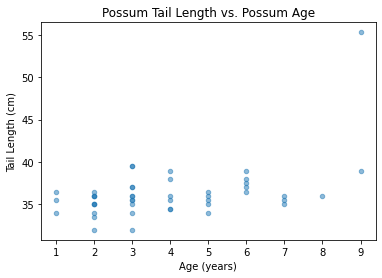

In [3]:
# Read in the data with pandas
possum_data = pd.read_csv("possum.csv") #file located in directory so don't need to list entire file path

# Make the scatter plot (don't forget the axis labels)
possum_data.head()
possum_age_data = possum_data['age'] #selecting the age column and assigning it to a variable
possum_tailL_data = possum_data['tailL'] #selecting the tail length column and assigning it to a variable

possum_data.plot(x = "age", y = "tailL", kind = 'scatter', alpha = 0.5) #using pandas to create a scatter plot, added an alpha to change the colour of the plot
plt.title('Possum Tail Length vs. Possum Age') #adding a title to the plot
plt.xlabel("Age (years)") #x axis label
plt.ylabel("Tail Length (cm)") #y axis label
plt.show() #shows the generated plot


### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \beta $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\beta$ are coefficients, and $\mathbf{y}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```
and call you function with these values! 

Report $\hat{\mathbf{y}}$. 
What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [4]:
def linearModelPredict(b,X):
    yp = np.dot(X, b)
    return yp

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])

print("X@b is:", linearModelPredict(b,X))

# Always important: Test the new function you have written! 
# By the way: What happens when b is a 2d-array?  


X@b is: [ 0.1 -0.2  0.7]


### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report RSS and gradient. 
Written answer: To minimize the cost do you need increase or decrease the value of the parameters? 

In [5]:
def linearModelLossRSS(b,x,y):

    predict_y = linearModelPredict(b,x) #get model prediction

    res = (y - predict_y) #get vector of residuals 
    RSS = np.sum (res**2) #get the residuals sum of squares
    gradient = [-2*np.sum(res), -2*np.sum(res*x[:,1])] #get the gradient & only select second column of x since first is all 1s

    #return rss and gradient
    return (RSS, gradient)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])

linearModelLossRSS(b,X,y)

(2.06, [-3.6, -4.0])

In [ ]:
#Written answer: To minimze the cost you need to increase the value of both of the parameters because the gradient is negative for both parameters

### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

Test the function with the values: 
```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report best parameters and the fitted R2. 


In [32]:
def linearModelFit(x,y,lossfcn):
    #b has to have the same dimensions as X has columns - 2d array
    
    bstart = [0,0] # set some starting values - set to zero but could technically set to anything
    Result = so.minimize(lossfcn, bstart, args=(X,y), jac=True) #call the optimization function
    
    res = linearModelLossRSS (Result.x,x,y) #residual recalculated
    y_average = np.average(y) #taking the average
    RSS = res[0] #retrieving just RSS
    TSS = sum((y-y_average)**2) #calculating TSS
    
    R2 = 1 - (RSS/TSS) #calculating R2
   
    return(Result.x, R2) # 0= no fit, 1= perfect fit

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

linearModelFit (X,y,linearModelLossRSS)

(array([0.6, 0.6]), 0.75)

### Question 1.5: /15 points

Use the above functions to fit your model to the possum data. Then use your model and the fitted parameters to make predictions along a grid of equally spaced possum ages.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with equally space ages (using for example np.linspace). Also report the R2 value for the fit. 



R2:0.22


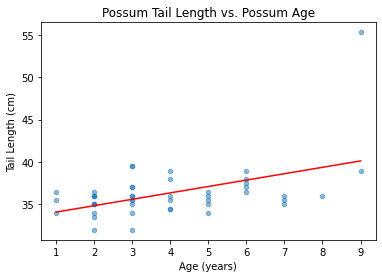

In [30]:
#Need to fit the data
#Make the design matrix using np.c_ 
y = possum_data['tailL'] #selecting the tail length
#OR y = possum_data.tailL.values
X =  np.c_[np.ones(possum_data.shape[0]), possum_data['age']] #creating x matrix by adding a column of 1's the same size as possum data

# Call your fitting function 
Result = linearModelFit(X,y,linearModelLossRSS) #fitting the model and returning parameters and R2
b = Result[0] # saving the parameters under b or couldve done b=Result.x

# Create the scatter plot (see question 1.1)
possum_data.plot(x = "age", y = "tailL", kind = 'scatter', alpha = 0.5) #using pandas to create a scatter plot, added an alpha to change the colour of the plot
plt.title('Possum Tail Length vs. Possum Age') #adding a title to the plot
plt.xlabel("Age (years)") #x axis label
plt.ylabel("Tail Length (cm)") #y axis label

# Create a new X matrix with equally space data
x_grid= np.linspace(possum_data['age'].min(), possum_data['age'].max(), num = np.size(possum_data['age']))#get grid
new_x = np.c_[np.ones(possum_data.shape[0]), x_grid]
y_predict = linearModelPredict(b,new_x) #get new y_predict based on x values

# Add the line to the graph 
plt.plot(x_grid, y_predict, color='red')

# Report R2
print("R2:" +str("{:.2f}".format(Result[1])));


## Part 2: LAD Regression

### Question 2.1:  /15 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report RSS and gradient. 

In [39]:
def linearModelLossLAD(b,x,y):
    predict_y = linearModelPredict(b,x) #get model prediction
    
    res = (y - predict_y) #get vector of residuals 
    SRES = np.sign(res); 
    
    sabs_dev = np.sum (abs(res)) #get the residuals sum of absolute errors
    gradient = [-np.sum(np.sign(res)), -np.sum(np.sign(res)*x[:,1])] #get the gradient

    #return LAD and gradient
    return (sabs_dev, gradient)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])

LAD, gradient = linearModelLossLAD(b,X,y)

print("LAD:", LAD, "\nGradient: ", gradient)

LAD: 2.0 
Gradient:  [-1.0, -1.0]


### Question 2.2: /10 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of equally spaced possum ages.  Once fit, the code below will plot the fit.  The code will also print the R squared value on the plot.

Written answer: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? Which one has a higher R2 value? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimiers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



In [1]:
y = possum_data['tailL'] #getting real y values
x = np.c_[np.ones(age.size), possum_data['age']]
b_LAD, R2 = linearModelFit(x,y, lossfcn=linearModelLossLAD)

# Create a new X matrix with equally space data
x_grid = np.arange(possum_data['age'].min(),possum_data['age'].max()+1)
x_new = np.c_[np.ones(x_grid.size), x_grid]
y_predict = linearModelPredict(b_LAD, x_new)

#Now create the plot
possum_data.plot(x = "age", y = "tailL", kind = 'scatter', alpha = 0.5) #using pandas to create a scatter plot, added an alpha to change the colour of the plot
plt.title('Possum Tail Length vs. Possum Age') #adding a title to the plot
plt.xlabel("Age (years)") #x axis label
plt.ylabel("Tail Length (cm)") #y axis label

y_predict_LAD = linearModelPredict(b_LAD,x_new) #get new y_predict based on x values

# Add the line to the graph 
plt.plot(x_grid, y_predict_LAD, color='purple')

#Report R2
print("R2:" +str("{:.2f}".format(R2)));


NameError: name 'possum_data' is not defined

In [ ]:
#Written answer: 
#L2 (OLS) has a higher R2 value because big errors count relatively more than 
#small errors. You can see there is an outlier at age 9, tail length 55, 
#that effected the fit for L2 (OLS) significantly more than it did for
#L1 (LAD).This is because for L2 (OLS) minimized the RSS and in turn this
#maximizes the R2

### Question 2.3: /15 points

Fit both an OLS model and a LAD model with `statsmodels`.  In no more than two sentences, comment on the rsquared values from `statsmodels` and the rsquared values from your models. Are they similar?

OLS R2: 0.22
LAD R2: nan


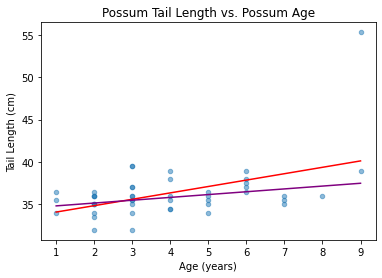

In [61]:
y = possum_data['tailL'] #retrieving y values
x = np.c_[np.ones(possum_data.shape[0]), possum_data['age']] #creating x matrix by adding a column of 1's the same size as possum data

model_OLS = sm.OLS(y,x) #calling the OLS function from the stats lib -recieves inputs and outputs and calculates
result_OLS = model_OLS.fit() #fit the model
b_OLS = np.array([result_OLS.params.const, result_OLS.params.x1]) #extracting parameters and storing

model_LAD = smf.quantreg(formula="tailL~age", data=possum_data) #LAD model created
result_LAD = model_LAD.fit(q=0.5) #fit the model
b_LAD = np.array([result_LAD.params.Intercept, result_LAD.params.age])#extracting parameters and storing

#lossfunction_result = linearModelLossLAD(b_LAD, x, y)
#RSS = lossfunction_result[0] #or could've done RSS linearModelLossLAD(b_LAD, x, y)[0]
#TSS = np.sum(np.abs(y-np.average(y)))
#R2 = 1 - (RSS/TSS)

# Report R2's
print("OLS R2: " +str("{:.2f}".format(result_OLS.rsquared))) # 0= no fit, 1= perfect fit
print("LAD R2: " +str("{:.2f}".format(result_LAD.rsquared))) # 0= no fit, 1= perfect fit

#Now create the plot
possum_data.plot(x = "age", y = "tailL", kind = 'scatter', alpha = 0.5) #using pandas to create a scatter plot, added an alpha to change the colour of the plot
plt.title('Possum Tail Length vs. Possum Age') #adding a title to the plot
plt.xlabel("Age (years)") #x axis label
plt.ylabel("Tail Length (cm)") #y axis label

# Create a new X matrix with equally space data
x_grid= np.linspace(possum_data['age'].min(), possum_data['age'].max(), num = np.size(possum_data['age']))#get grid
new_x = np.c_[np.ones(possum_data.shape[0]), x_grid]

y_predict_OLS = linearModelPredict(b_OLS,new_x) #get new y_predict based on x values
y_predict_LAD = linearModelPredict(b_LAD,new_x) #get new y_predict based on x values


# Add the line to the graph 
plt.plot(x_grid, y_predict_OLS, color='red')
plt.plot(x_grid, y_predict_LAD, color='purple')

In [ ]:
#Written Answer: 
#The R2 value for OLS is identical, 0.22 for both cases
#But the R2 value for LAD in this case is "nan" 
#whereas before 0.13 was calculated